#### This is used to go in the same directory as when everything is run under Pycharm in a normal python file

In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Fede\Documents\GitHub\RelGAN\src\topic_modelling


In [2]:
os.chdir("..")
os.chdir("..")
cwd = os.getcwd()
print(cwd)
assert cwd.endswith("RelGAN")

C:\Users\Fede\Documents\GitHub\RelGAN


### Test new data_loader

In [31]:
import numpy as np
from nltk.stem import PorterStemmer as ps

In [4]:
from src.topic_modelling.lda_topic import train_specific_LDA, get_corpus, LDA

coco = True
corpus_raw = get_corpus(coco)
lda = train_specific_LDA(corpus_raw, num_top=3, passes=2, iterations=2, chunksize=2000, coco=coco)

C:\Users\Fede\Anaconda3\envs\SeqGAN\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Model loaded


In [ ]:
corpus_raw

In [5]:
lda_model = lda.lda_model
from gensim.models import LdaModel

assert isinstance(lda_model, LdaModel)
lda_model

In [6]:
topics = lda_model.get_topics()

In [7]:
dictionary = lda.dictionary
print([dictionary[x[0]] for x in lda_model.get_topic_terms(1)])


['bathroom', 'toilet', 'sink', 'wall', 'cat', 'window', 'mirror', 'airplane', 'sky', 'shower']


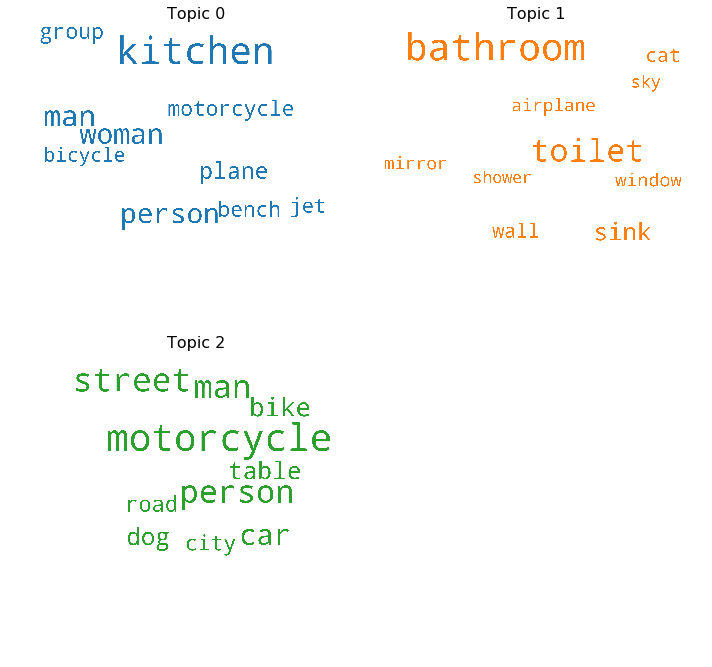

In [17]:
from src.topic_modelling.lda_utils import word_cloud
%matplotlib inline

word_cloud(lda)

#### Create Topic Vector for sentences in the dataset

In [8]:
import pandas as pd
import re

from gensim.utils import lemmatize, simple_tokenize

def process_texts(input_texts, stops):
    final = []
    for i in input_texts:
        texts = (re.sub(r"http\S+", "", i))
        # tokenize
        texts = simple_tokenize(texts)
        # lower case
        texts = [word.lower() for word in texts]
        # remove stopwords
        texts = [word for word in texts if word not in stops]

        # automatically detect common phrases
        texts = [str(word).split('/')[0].split('b\'')[1] for word in
                 lemmatize(' '.join(texts), allowed_tags=re.compile('(NN)'), min_length=3)]

        final.append(texts)
    return final

def get_perc_sent_topic(ldamodel, corpus, texts, stops):
    # Init output
    sent_topics_df = pd.DataFrame()
    texts = process_texts(texts, stops)

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list

        # row = sorted(row, key=lambda x: (x[1]), reverse=True) # sort list to get dominant topic
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        to_append = []
        for j, (topic_num, prop_topic) in enumerate(row):
            # if j == 0:  # => dominant topic
            #     wp = ldamodel.show_topic(topic_num)
            #     topic_keywords = ", ".join([word for word, prop in wp])
            #     sent_topics_df = sent_topics_df.append(
            #         pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index=True)
            # else:
            #     break
            to_append.append(prop_topic)
        sent_topics_df = sent_topics_df.append(pd.Series(to_append), ignore_index=True)
    sent_topics_df.columns = ["Topic {}".format(topic_number) for topic_number in range(len(to_append))]

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = sent_topics_df.reset_index()
    return sent_topics_df


In [9]:
from src.topic_modelling.lda_topic import get_dominant_topic_and_contribution

df = get_perc_sent_topic(ldamodel=lda.lda_model, corpus=lda.corpus_bow, texts=lda.corpus_text, stops=lda.stops)

In [67]:
df.head(5)

,index,Topic 0,Topic 1,Topic 2,0
0,0,0.526361,0.369548,0.104091,"[bicycle, replica, clock, wheel]"
1,1,0.463242,0.096018,0.440740,"[honda, motorcycle, garage]"
2,2,0.094992,0.700151,0.204857,"[room, wall, door]"
3,3,0.118244,0.117362,0.764394,"[car, car]"
4,4,0.668463,0.217925,0.113613,"[passenger, airplane, air]"


In [11]:
topic_matrix = lda.lda_model.get_topics() #  3 topics * 2280 words

In [12]:
topic_weights = df.values[:, 1:topic_num + 1]
sentences_number = topic_weights.shape[0]
word_count = topic_matrix.shape[1]
size = ((int(sentences_number), int(word_count)))
print("Topic sentnece dim: {}".format(size))
topic_sentences = np.zeros(size)

Topic sentnece dim: (10000, 2280)


In [66]:
topic_weights[:, 0]

array([0, 1, 2, ..., 9997, 9998, 9999], dtype=object)

In [13]:
for index in range(topic_sentences.shape[0]):
    topic_sentences[index] = np.dot(np.expand_dims(topic_weights[index], 0), topic_matrix).squeeze()

In topic_sentneces ho per ogni sentence il topic 'pesato'

In [ ]:
index_dict = lda.dictionary
index

than I have to make this vector of the same size of the vector used by the model (circa 4k) keeping the parallelism between words

In [19]:
from src.path_resolution import resources_path
from src.utils.text_process import text_precess
dataset = "image_coco"
data_file = resources_path("data", '{}.txt'.format(dataset))
seq_len, vocab_size, index_word_dict = text_precess(data_file)

In [23]:
lda_word_index_dict = lda.dictionary.token2id
model_index_word_dict = {v: k for k, v in word_index_dict.items()}
lda_index_word_dict = lda.dictionary.id2token
model_word_index_dict = word_index_dict

In [50]:
texts = [str(lemmatize(word, min_length=2)).split('/')[0].split("b\'")[-1] for word in model_word_index_dict.keys()]
for x in model_keys_stemmed:
    if x.startswith("cucu"):
        print(x)
def get_model_index(lda_index):
    word = lda_index_word_dict[lda_index]
    #print("{} is word {}".format(lda_index, word))
    try:
        return model_word_index_dict[word]
    except KeyError:
        return [index for index in range(len(texts)) if texts[index] == word]

real_vector = np.zeros((topic_sentences.shape[0], len(model_index_word_dict)))
inverse_indexes = [get_model_index(i) for i in range(len(lda_index_word_dict))]
print(inverse_indexes)

cucumb
['4525', '4092', '1124', '281', '2918', '1361', '3313', '2990', '1577', '195', '4494', '3367', '4291', '1408', '1338', '3401', '3847', '2304', '1112', '4594', '955', '527', '857', '2853', '3454', '2175', '2185', '4458', '465', '819', '2900', '3071', '706', '1560', '4057', '1929', '652', '784', '2375', '2780', '2736', '3214', '3787', '1561', '2987', '714', '350', '666', '3383', [3749], '4579', '785', '4548', '797', '215', '1448', '2206', '3508', '3129', '2762', '3808', '1272', '2844', '2734', '2140', '1981', '277', '409', '4182', '1096', '2347', '1127', '4296', '2488', '3463', '3201', '4476', '2707', '123', '2980', '2305', '775', '2777', '1595', '3379', '2295', '3447', '1355', '1855', '2657', '2600', '2188', '1443', '4235', '4341', '2676', '1043', '949', '557', '2127', '275', '4071', '3380', '3711', '1800', '417', '206', '544', '3322', '4447', '341', '1705', '505', '197', '4418', '2114', '3970', '2416', '3484', '1703', '2692', '475', '1840', '1388', '2535', '3830', '3166', '2815'

In [51]:
len(model_index_word_dict)

4681

In [52]:
len(lda_index_word_dict)

2280

In [64]:
for ind, invere_index in enumerate(inverse_indexes):
    if isinstance(invere_index, list):
        # more than one index in the model because of lemmatization
        for x in invere_index:
            real_vector[:, x] = topic_sentences[:, ind]
    else:
        invere_index = int(invere_index)
        real_vector[:, invere_index] = topic_sentences[:, ind] 

Adesso nel real vector (num_sentences, model_word_number) c'è il topic vector estratto da LDA per ogni frase nel modello